In [12]:
import os
import sys
import random
import time

from sdirl.model import *
from sdirl.gridworld.model import GridWorldFactory
from sdirl.rl.simulator import RLParams

import warnings
warnings.simplefilter("ignore")

import matplotlib.pyplot as pl
%matplotlib inline

def get_model(parameters, grid_size, ground_truth, world_seed, training_episodes):
    rl_params = RLParams(
                 n_training_episodes=training_episodes,
                 n_episodes_per_epoch=100,
                 n_simulation_episodes=1000,
                 q_alpha=0.1,
                 q_gamma=0.98,
                 exp_epsilon=0.1,
                 exp_decay=1.0)
    gwf = GridWorldFactory(parameters,
            grid_size=grid_size,
            step_penalty=0.05,
            prob_rnd_move=0.05,
            world_seed=world_seed,
            rl_params=rl_params,
            max_sim_episode_len=999,
            ground_truth=ground_truth,
            initial_state="edge",
            grid_type="walls")
    return gwf.get_new_instance(approximate=True)

def run_experiment(n_features, grid_size, reps, eps, random_state):
    parameters = list()
    for i in range(1, n_features+1):
        parameters.append(ModelParameter("feature{}_value".format(i), bounds=(-1, 0)))

    if n_features == 4:
        ground_truth = [-0.2, -0.4, -0.6, -0.8]
    if n_features == 3:
        ground_truth = [-0.25, -0.5, -0.75]
    if n_features == 2:
        ground_truth = [-0.33, -0.67]
    if n_features == 1:
        ground_truth = [-0.5]
    
    obs_mean = list()
    obs_std = list()
    j = 0
    world_seeds = [random_state.randint(1e7) for i in range(reps)]
    for training_episodes in eps:
        obs_mean.append(list())
        obs_std.append(list())
        for i in range(reps):
            model = get_model(parameters, grid_size, ground_truth, world_seeds[i], training_episodes)
            start_time = time.time()
            obs = model.simulate_observations(*ground_truth, random_state=random_state)[0].data
            end_time = time.time()
            print("{} training episodes experiment run {:.2f} min"
                  .format(training_episodes, (end_time-start_time)/60.0))
            avg_rewards = [float(np.mean(ses["rewards"])) for ses in obs["sessions"]]
            obs_mean[j].append(float(np.mean(avg_rewards)))
            obs_std[j].append(float(np.std(avg_rewards)))
        j += 1
    
    plot_data("Grid size {} with {} features ({} reps)".format(grid_size, n_features, reps),
              eps, obs_mean, obs_std)
    
def plot_data(main_title, x, mean, std):
    fig, axarr = pl.subplots(2, sharex=True, figsize=(4,5))
    for i, data, title in zip([0,1], [mean, std], ["reward mean", "reward std"]):
        m = np.mean(data, axis=1)
        s = np.std(data, axis=1)
        axarr[i].plot(x, m, "b")
        axarr[i].fill_between(x, m-s, m+s, facecolor="b", alpha=.25)
        for j in range(len(data[0])):
            axarr[i].plot(x, np.array(data)[:,j], "r")
        axarr[i].set_title(title)
    pl.xlabel("Average reward and std as a function of training sessions")
    pl.xscale("log")
    pl.suptitle(main_title)
    pl.show()

def plot_convergence(size=3, reps=5, max_eps_exp=5):
    rs = np.random.RandomState(123)
    eps = [10 ** (i+1) for i in range(max_eps_exp)]
    for n in [3]:
    #for n in [1,2,3,4]:
        run_experiment(n, size, reps, eps, rs)

10 training episodes experiment run 0.01 min
10 training episodes experiment run 0.01 min
10 training episodes experiment run 0.01 min
10 training episodes experiment run 0.01 min
10 training episodes experiment run 0.01 min
10 training episodes experiment run 0.01 min
10 training episodes experiment run 0.01 min
10 training episodes experiment run 0.01 min
10 training episodes experiment run 0.01 min
10 training episodes experiment run 0.01 min
100 training episodes experiment run 0.02 min
100 training episodes experiment run 0.01 min
100 training episodes experiment run 0.01 min
100 training episodes experiment run 0.01 min
100 training episodes experiment run 0.01 min
100 training episodes experiment run 0.01 min
100 training episodes experiment run 0.01 min
100 training episodes experiment run 0.02 min
100 training episodes experiment run 0.01 min
100 training episodes experiment run 0.01 min
1000 training episodes experiment run 0.02 min
1000 training episodes experiment run 0.01 

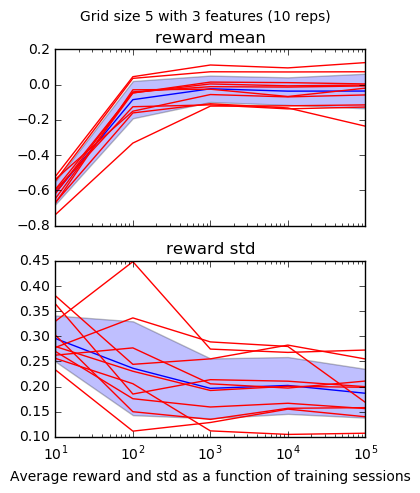

In [24]:
plot_convergence(size=5, reps=10, max_eps_exp=5)

10 training episodes experiment run 0.02 min
10 training episodes experiment run 0.02 min
10 training episodes experiment run 0.02 min
10 training episodes experiment run 0.02 min
10 training episodes experiment run 0.02 min
10 training episodes experiment run 0.02 min
10 training episodes experiment run 0.02 min
10 training episodes experiment run 0.02 min
10 training episodes experiment run 0.02 min
10 training episodes experiment run 0.02 min
100 training episodes experiment run 0.02 min
100 training episodes experiment run 0.02 min
100 training episodes experiment run 0.02 min
100 training episodes experiment run 0.02 min
100 training episodes experiment run 0.02 min
100 training episodes experiment run 0.02 min
100 training episodes experiment run 0.02 min
100 training episodes experiment run 0.02 min
100 training episodes experiment run 0.02 min
100 training episodes experiment run 0.02 min
1000 training episodes experiment run 0.04 min
1000 training episodes experiment run 0.04 

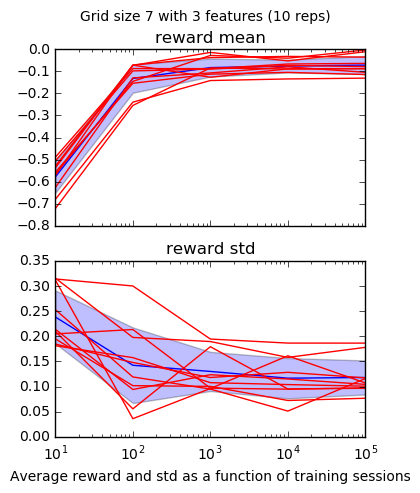

In [23]:
plot_convergence(size=7, reps=10, max_eps_exp=5)

10 training episodes experiment run 0.03 min
10 training episodes experiment run 0.03 min
10 training episodes experiment run 0.03 min
10 training episodes experiment run 0.03 min
10 training episodes experiment run 0.03 min
10 training episodes experiment run 0.03 min
10 training episodes experiment run 0.03 min
10 training episodes experiment run 0.03 min
10 training episodes experiment run 0.03 min
10 training episodes experiment run 0.03 min
100 training episodes experiment run 0.03 min
100 training episodes experiment run 0.03 min
100 training episodes experiment run 0.03 min
100 training episodes experiment run 0.03 min
100 training episodes experiment run 0.03 min
100 training episodes experiment run 0.03 min
100 training episodes experiment run 0.03 min
100 training episodes experiment run 0.03 min
100 training episodes experiment run 0.03 min
100 training episodes experiment run 0.03 min
1000 training episodes experiment run 0.06 min
1000 training episodes experiment run 0.05 

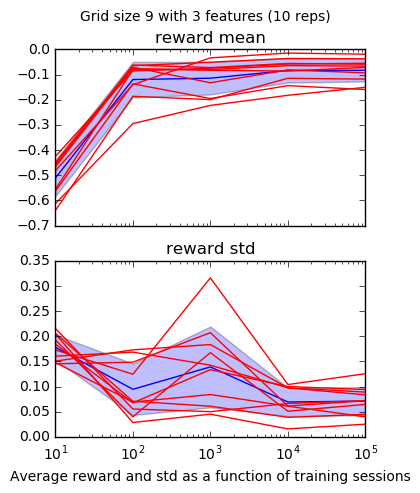

In [22]:
plot_convergence(size=9, reps=10, max_eps_exp=5)

10 training episodes experiment run 0.04 min
10 training episodes experiment run 0.04 min
10 training episodes experiment run 0.04 min
10 training episodes experiment run 0.04 min
10 training episodes experiment run 0.04 min
10 training episodes experiment run 0.04 min
10 training episodes experiment run 0.05 min
10 training episodes experiment run 0.04 min
10 training episodes experiment run 0.04 min
10 training episodes experiment run 0.04 min
100 training episodes experiment run 0.05 min
100 training episodes experiment run 0.05 min
100 training episodes experiment run 0.05 min
100 training episodes experiment run 0.05 min
100 training episodes experiment run 0.05 min
100 training episodes experiment run 0.05 min
100 training episodes experiment run 0.05 min
100 training episodes experiment run 0.05 min
100 training episodes experiment run 0.05 min
100 training episodes experiment run 0.05 min
1000 training episodes experiment run 0.09 min
1000 training episodes experiment run 0.09 

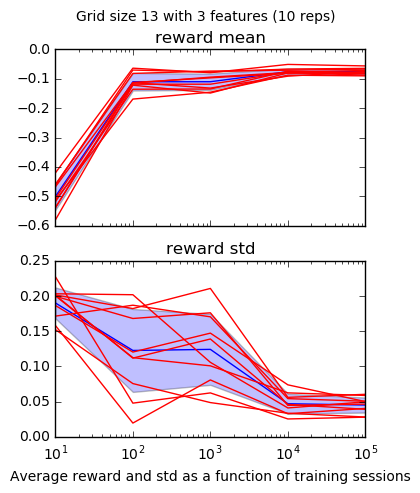

In [20]:
plot_convergence(size=13, reps=10, max_eps_exp=5)

10 training episodes experiment run 0.06 min
10 training episodes experiment run 0.06 min
10 training episodes experiment run 0.06 min
10 training episodes experiment run 0.06 min
10 training episodes experiment run 0.06 min
10 training episodes experiment run 0.06 min
10 training episodes experiment run 0.06 min
10 training episodes experiment run 0.06 min
10 training episodes experiment run 0.06 min
10 training episodes experiment run 0.06 min
100 training episodes experiment run 0.07 min
100 training episodes experiment run 0.07 min
100 training episodes experiment run 0.07 min
100 training episodes experiment run 0.07 min
100 training episodes experiment run 0.07 min
100 training episodes experiment run 0.07 min
100 training episodes experiment run 0.07 min
100 training episodes experiment run 0.07 min
100 training episodes experiment run 0.07 min
100 training episodes experiment run 0.07 min
1000 training episodes experiment run 0.13 min
1000 training episodes experiment run 0.13 

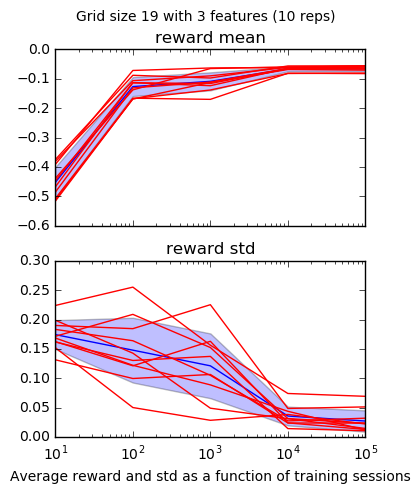

In [21]:
plot_convergence(size=19, reps=10, max_eps_exp=5)